# Question 1

The standard error of the mean is the amount of variance there could be between the mean of the population and the average mean of many samples. The mean of a sample might not accurately reflect the mean of the population, because the sample size is smaller and every data point has more sway. The standard error of the mean is the measurement of deviation of the mean between many samples which is the main difference between the standard error of the mean and the standard deviation. The standard deviation only measures the variability of the mean within one sample.

Summary:
You asked about what affects the Standard Error of the Mean (SEM), and I explained that the two main factors are sample size (as sample size increases, SEM decreases) and population standard deviation (greater variability in the population increases the SEM).

You also inquired about the definition of SEM, and I clarified that it measures the precision with which the sample mean estimates the population mean. A lower SEM indicates more precise estimates. The formula for SEM is:

 It is related to the variability of sample means, as opposed to the standard deviation, which measures variability within the sample itself.

# Question 2

The formula to get the 95% confidence interval from the standard error of the mean is the mean of the bootstrapped samples plus or minus 1.96 times the standard error of the mean. The 1.96 comes from a standard normal distribution because 95% of data lies within 1.96 standard deviations while the other 5% is in the tails.

Summary:
You asked about factors that affect the Standard Error of the Mean (SEM) and its role in constructing a 95% confidence interval for bootstrapped sample means.
I explained that SEM is influenced by sample size and population variability and how we can use the SEM along with a Z-score (typically 1.96 for 95% confidence) to build a confidence interval.
We discussed bootstrapping as a non-parametric method that uses resampling to estimate the variability of sample means and why this method is theoretically justified.
Finally, we explored where the Z-score of 1.96 comes from, which is based on the standard normal distribution and the concept of leaving 2.5% of the data in each tail to get the central 95%.

# Link for question 1 and 2: https://chatgpt.com/share/66f6d2df-7598-800d-b3bb-f24a74798868

# Question 3

To create the 95% confidence interval without the SEM you can find the 2.5 and 97.5 percentiles and put these as your lower and upper bounds. This can be done using either np.percentile or np.quantile. Here is an example.

In [2]:
import numpy as np

def bootstrap_ci(data, num_bootstrap_samples=1000, ci_percentile=95):
    # Step 1: Generate bootstrap samples and calculate their means
    bootstrapped_means = [
        np.mean(np.random.choice(data, size=len(data), replace=True))
        for _ in range(num_bootstrap_samples)
    ]

    # Step 2: Sort the bootstrapped means
    bootstrapped_means = np.sort(bootstrapped_means)

    # Step 3: Calculate the percentiles for the confidence interval
    lower_percentile = (100 - ci_percentile) / 2
    upper_percentile = 100 - lower_percentile

    # Step 4: Get the confidence interval bounds
    lower_bound = np.percentile(bootstrapped_means, lower_percentile)
    upper_bound = np.percentile(bootstrapped_means, upper_percentile)

    return lower_bound, upper_bound

# Example usage:
#data = [your_data_array]
#lower, upper = bootstrap_ci(data)
#print(f"95% Bootstrapped CI: [{lower}, {upper}]")


Summary:
Bootstrapped Confidence Interval:

You asked how to create a 95% bootstrapped confidence interval using bootstrapped means without relying on their standard deviation.
I explained the steps: generating bootstrap samples, calculating their means, sorting them, and finding the 2.5th and 97.5th percentiles to form the confidence interval. I also provided a Python code example that implements this.
Difference Between np.percentile and np.quantile:

You inquired about the difference between np.percentile and np.quantile.
I clarified that np.percentile takes a percentile (0-100), while np.quantile takes a quantile fraction (0-1), but both functions return equivalent results if used correctly. I provided an example showing how the two relate.

# Link for question 3: https://chatgpt.com/share/66f70a9d-7770-800d-aac7-d107f943ab9b

# Question 4

In [ ]:
import numpy as np

#Creates a function with arguments of the data, the number of bootstrap samples and the % confidence interval as a decimal
#Creates list for the means or other parameter
def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, confidence_level=0.95):
    bootstrap_means = [] 
    
    #Creates the sample(of same size as original and with replacement) and then finds the mean or other parameter and puts into the list 
    #Does this for as many samples as wanted
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample)) #To find something other then the mean change this line, ex. np.median instead of np.mean
    
    #Uses np.percentile to find lower and upper bound of the CI we are looking for from the list of means or other parameter
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    
    return lower_bound, upper_bound

# Example usage
data = np.random.normal(50, 10, 100)
bootstrap_confidence_interval(data)


Summary:
In this interaction, we discussed how to create a Python code that calculates a 95% bootstrap confidence interval for a population mean. I provided a code example and explained its components, including how bootstrap sampling works and what each part of the code does. Specifically, we explored:

The role of size=len(data) in specifying the size of the bootstrap sample.
The purpose of .append(), which adds calculated statistics (means) to the bootstrap_means list.
How to modify the code to compute different statistics (like median, variance, or standard deviation) by changing the line where the mean is calculated.
Each aspect was aimed at deepening your understanding of the code and how it can be adapted to various statistical purposes.
# Link for question 4: https://chatgpt.com/share/66f70f0d-589c-800d-beca-aca5e97c0cfb

# Question 5

Its important to distinguish between population parameters and sample statistics because of what they represent. Population parameters represent values that pertain to the entire population and they are often unknown. Sample statistics are estimates of the population parameters derived from a sample. Sample statistics are used to estimate population parameters but they aren't exact which is why we have confidence intervals. It's important to distinguish between the two because their use is not the same, their values are not the same, and often we can't even know the exact value of a population parameter.

Summary: You asked why it's important to distinguish between population parameters and sample statistics when dealing with confidence intervals. I explained that population parameters are fixed but usually unknown values that describe the entire population, while sample statistics are estimates derived from a sample. Since samples vary, sample statistics are subject to sampling error. Confidence intervals use sample statistics to estimate population parameters, providing a range within which the true population parameter likely falls. This distinction is key because confidence intervals account for the uncertainty and variability that arise from using samples instead of the full population.

# Link for Question 5: https://chatgpt.com/share/66fc8924-cef0-800d-93a6-1fc171719302

# Question 6

1. To bootstrap you start by taking one sample of a bigger population. The population is every single data point in a dataset, while a sample is a group of these data points that show the general idea of the entire population. You then take the data points from this sample and create more samples using the same data. Even though these samples all come from the same original sample they will be different, because when bootstrapping you sample with replacement which means that the same data point can be chosen multiple times. Once you have all your new samples you can use these to estimate the mean or other statistics of the original population. These estimates won't be exact since samples don't always perfectly represent the population, or the whole idea of the dataset, but they allow us to get the general idea.

2. Bootstrapping is used to get accurate estimates about a population without having to repeat an experiment many times. By bootstrapping we can get the same amount/spread of data without having to put in the extra work to redo the experiment. With all the data we can make estimates about what an entire dataset might look like, for example the mean or the standard deviation, because often these exact values for the population are unknown.

3. To see if a hypothesized guess about the mean of a population could be possible we can use a sample of size n to create many other samples also of size n by using different, random combinations of the data. With these samples we can get a distribution of the means by looking at the mean of every sample. This give us an interval that we can be 95% confident the mean of the population would fall into. So if the hypothesized guess was in this interval we would be able to feel pretty confident that it's a correct guess.

# Question 7

We can't reject the idea that the mean could be zero because the statistic sample could be biased and showing positive or negative results when in reality there are actually no side effects to this drug on average. This can happen when more outliers are in the sample, shifting the mean away from zero toward either side. If the confidence interval does not overlap zero then we can confidently reject that the drug does nothing. If the confidence interval does not overlap 0 that means 95% of the samples are getting means not on zero so we can be confident that when the mean is zero that is more likely because of outliers or bias.

# Question 8

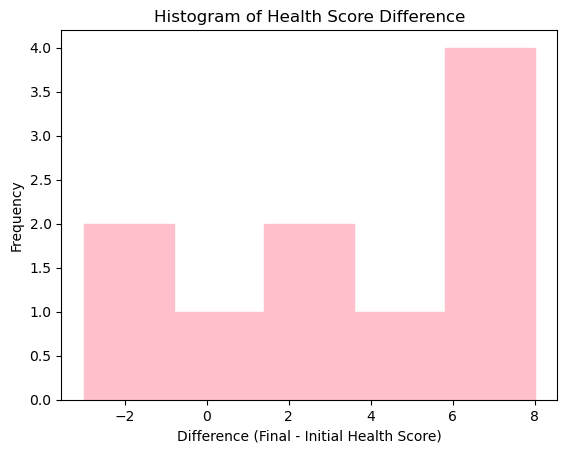

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data provided
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Calculate the difference between Final and Initial Health Scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Plot the histogram
plt.hist(df['HealthScoreDifference'], bins=5, color='pink', edgecolor='pink')

# Add titles and labels
plt.title('Histogram of Health Score Difference')
plt.xlabel('Difference (Final - Initial Health Score)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


This graph shows the difference in health scores that people felt after getting the vaccine. A positive score means they felt better, a negative score means they felt worse and a null hypothesis would mean that the vaccine had no positive or negative effects on a person. This graph shows that most people noticed a positive change while taking the medicine but I'm interested in knowing if this is true or if the data was just biased. Some reasons why this data might be biased would be some people started off healthier than others so the vaccine seemed to work more for them or more people who felt a positive difference got asked compared to people who felt a negative difference. I also want to know if a null hypothesis can really be dissmissed at this point in the tests. Bootstrapping can be used to combat the possibility of bias in a sample this small. In this case, bootstrapping means taking the data here and making many more samples with the same data using sampling with replacement. This will create different samples that we can use to find a mean that has the chance to be less biased and see if a null hypothesis could be possible for the vaccine.

Estimated mean of the population (using bootstrapping): 3.3075
95% Confidence Interval: (0.7, 5.5)


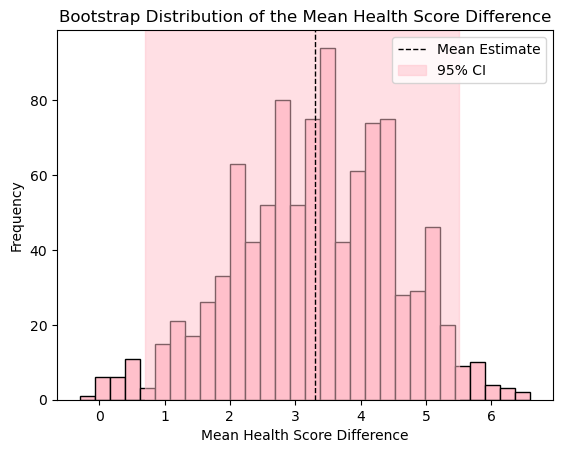

In [4]:
import numpy as np

np.random.seed(42)

# Calculate the difference between Final and Initial Health Scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping parameters
n_iterations = 1000  # Number of bootstrap samples
n_size = len(df)  # Size of each sample (equal to the original dataset)
bootstrap_means = []  # Store the means from each bootstrap sample

# Perform bootstrapping
for i in range(n_iterations):
    # Generate a bootstrap sample by sampling with replacement
    bootstrap_sample = df['HealthScoreDifference'].sample(n=n_size, replace=True)
    
    # Calculate the mean of the bootstrap sample and store it
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_means.append(bootstrap_mean)

# Calculate the estimate of the population mean (mean of bootstrap means)
mean_estimate = np.mean(bootstrap_means)

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)  # 2.5th percentile
upper_bound = np.percentile(bootstrap_means, 97.5)  # 97.5th percentile

print(f"Estimated mean of the population (using bootstrapping): {mean_estimate}")
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")

# Plot the distribution of bootstrap means
plt.hist(bootstrap_means, bins=30, color='pink', edgecolor='black')
plt.title('Bootstrap Distribution of the Mean Health Score Difference')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')

# Add the mean estimate line
plt.axvline(mean_estimate, color='black', linestyle='dashed', linewidth=1, label='Mean Estimate')

# Add the confidence interval box
plt.axvspan(lower_bound, upper_bound, color='pink', alpha=0.5, label='95% CI')

# Add legend
plt.legend()

# Show the plot
plt.show()


By using the above code to calculate the mean of every bootstrap sample and compile them into this histogram we can see that the difference in people's health is actually closer to 3 than 7. This shows that the sample by itself is biased towards the positive. This is useful because it might chage peoples opinions on if they want to get the vaccine or not. It is always useful to know that since 0 is outside of the 95% confidence interval we can be very confident that this medicine doesn't do nothing. Both of these facts could make people more or less inclined to get the vaccine. Since 0 is outside of the confidence interval they might be more willing to give it a shot if they felt really bad to begin with, but since the mean is now a smaller positive change people who already feel pretty good might not want to get the vaccine and risk side effects.




Summary: Data Handling:

You provided a dataset related to patient health scores, including Patient ID, Age, Gender, Initial Health Score, and Final Health Score.
I assisted you in creating a CSV file from the dataset, which you could download.
Data Analysis:

You requested help with visualizing the difference between Initial and Final Health Scores using a histogram.
I provided Python code to create the histogram, illustrating the distribution of health score differences.
Bootstrapping:

You expressed interest in using bootstrapping to estimate the mean of the population.
I supplied Python code that performs bootstrapping on the health score differences and calculates the estimated mean and 95% confidence interval.
I added a feature to visualize the confidence interval on the histogram.
Reproducibility:

You requested a way to make the analysis more accessible by incorporating np.random.seed() to ensure reproducibility of the results.
I included the np.random.seed() function in the bootstrapping code, allowing for consistent results across different runs.

# Link for Question 8:https://chatgpt.com/share/66fc98e3-b0dc-800d-a140-e2a7aeefa5b5

# Question 9
yes